## Tarea 1 Procesamiento Digital de Señales

En este informe se resolverán 3 distintos problemas, presentando las descripciones de los procesos realizados, utilizando las librerías de Python y ThinkDSP, mostrando gráficos que apoyen dichos procesos y analizando los resultados.


## Problema 1

La señal "cuadrada.wav", que contiene una señal cuadrada, fue muestreada a 11025 muestras/s.
Se establecerá la frecuencia fundamental de la señal, considerando que es posible que la velocidad de
muestreo genere aliasing. Se reconstruirá la señal filtrando las componentes para evitar el aliasing.


Para ello, se importarán las bibliotecas correspondientes de ThinkDSP y Numpy, además de otras de Python.

In [1]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot
import numpy as np
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

Luego, se carga el archivo "cuadrada.wav" para poder escuchar y ver su contenido.

In [2]:
wave = thinkdsp.read_wave('cuadrada.wav')
wave.make_audio()

Se tiene en cuenta que el framerate del audio es 11025 Hz, por lo que su frecuencia espectral máxima será de (11025/2) Hz que equivale a aproximadamente 5513 Hz.

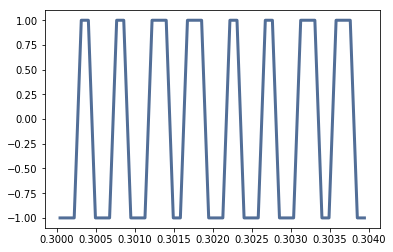

In [3]:
wave.segment(start=0.3, duration=0.004).plot()

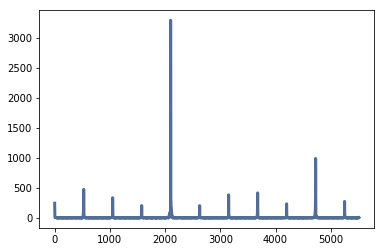

In [4]:
spectrumori = wave.make_spectrum() #espectrograma del audio (frecuencia hasta 11025/2)
spectrumori.plot()

Se puede analizar que esta señal muestreada contiene aliasing, ya que la segunda componente armónica de la señal debería ser aproximadamente 3 veces la frecuencia fundamental, esto es porque las señales cuadradas contienen sus componentes armónicas multiplicando por números impares la frecuencia fundamental, que es aproximadamente 2100 Hz.

Actualmente en "cuadrada.wav" la segunda componente armónica está en la frecuencia 4700 Hz paroximadamente, siendo que debería comenzar en (2100 x 3) Hz = 6300 Hz. Esto sucede porque la frecuencia de muestreo es de 11025 Hz, la componente de frecuencia máxima de la señal original es la antes mencionada (11025 / 2) Hz = 5513 Hz. Por lo que se crea un efecto espejo con las componentes que deberían seguir después de esa frecuencia. Teniendo este efecto, se calcula que (6300-5513) = 788 corresponde a la distancia de frecuencias de la siguiente armónica con la máxima espectral, por lo que (5513 - 788) = 4725, que es donde se puede analizar en el espectrograma donde está la segunda componente más grande, representada por la armónica reflejada a causa del aliasing.

Para la reconstrucción de la señal sin aliasing, se creará una señal cuadrada. Se representará graficamente y sonoramente a continuación.

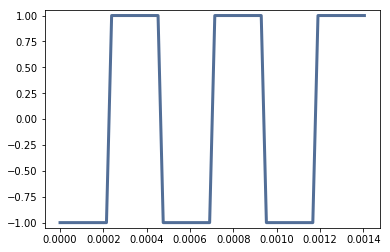

In [5]:
signal = thinkdsp.SquareSignal(2100) #creación de señal cuadrada con f fundamental en 2100 Hz
duration = signal.period*3
segment = signal.make_wave(duration, framerate=42000) #Segmento creado con framerate de muestreo alto para visualización.
segment.plot()
thinkplot.config(ylim=[-1.05, 1.05], legend=False)

In [6]:
wave = signal.make_wave(duration=0.5, framerate=11025) # Misma frecuencia de muestreo que el sonido original
wave.apodize()
wave.make_audio()

Como se puede apreciar, el sonido es practicamente igual, al igual que su forma de onda. Por lo que se procedió a visualizar su espectro, que contiene el mismo efecto de aliasing de la primera señal.

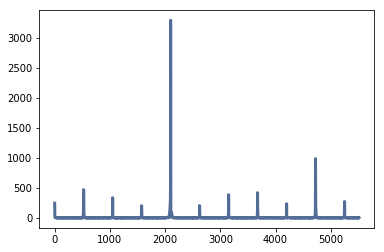

In [7]:
spectrum = wave.make_spectrum()
spectrum.plot()

Para la eliminación de este efecto de aliasing, se procedió a muesrear este sonido por una frecuencia 3 veces mayor a la de muestreo original, para lograr visualizar las componentes armónicas adyacentes sin efecto de aliasing notorio, obteniendo el siguiente gráfico y sonido.

In [8]:
wave3 = signal.make_wave(duration=0.5, framerate=11025*3) #sobremuestreo para visualizar las primeras armónicas sin aliasing
wave3.apodize()
wave3.make_audio()


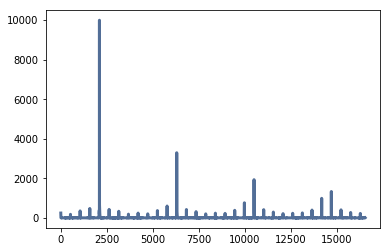

In [9]:
spectrum3 = wave3.make_spectrum()
spectrum3.plot()

Se logran escuchar las componentes más agudas de la señal muestreada, y en el gráfico se pudo observar que no existe un aliasing notorio en la frecuencia en la que reconstruirá la señal, correspondiente a 11025/2 = 5513 Hz. Por lo que se le aplicará un filtro pasabajo a este espectro de frecuencias.

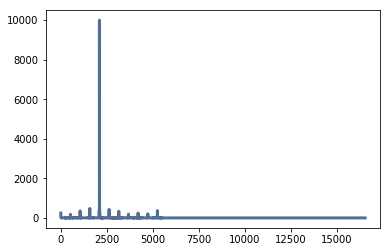

In [10]:
spectrum3.low_pass(11025/2) #se eliminan todas las frecuencias que sobrepasan la frecuencia crítica 
                            #(la que corresponde a la mitad de la frecuencia de muestreo elegida) en la señal de entrada.
spectrum3.plot()

Realizando esto, se obtiene una señal parecida a la anterior pero sin el componente armónico reflejado por el aliasing.

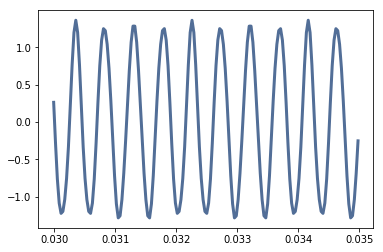

In [11]:
wave4 = spectrum3.make_wave()
wave4.segment(start=0.03, duration=0.005).plot()

In [12]:
wave4.make_audio()

Como se pudo observar en el gráfico, la onda cambio de forma al eliminar este componente de aliasing, al igual que el sonido, el cual se escucha un poco más suave.

## Problema 2

La señal "desconocida.wav" contiene una señal desconocida. A partir de análisis temporales y de
espectrograma, se describirá el tipo de señal encontrada (forma de onda, variación con el tiempo, etc.)


Primero, se carga la señal y se escucha para tener una idea preliminar de su contenido.

In [13]:
wave = thinkdsp.read_wave('desconocida.wav')
wave.make_audio()

Se puede observar que la señal contiene 3 tipos diferentes de sonidos, por lo que se procedió a dividir esta señal en 3 partes diferentes.

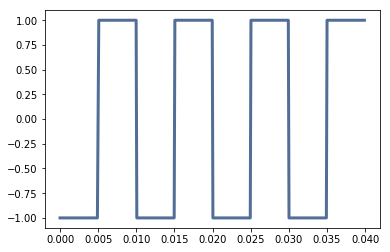

In [14]:
primera = wave.segment(start=0.0, duration=1)
primera.segment(start=0.0, duration=0.04).plot()
primera.make_audio()

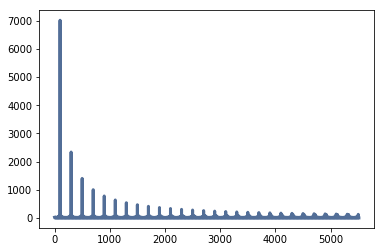

In [15]:
spectrum_primera = primera.make_spectrum()
spectrum_primera.plot()

El primer sector de sonido corresponde a una señal cuadrada con amplitud sobresaliente en frecuencias bajas, luego se procedió a analizar el siguiente segmento de señal.

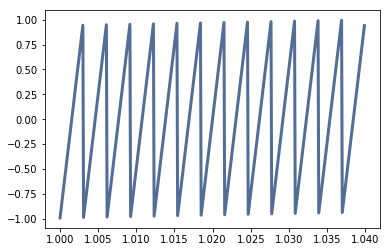

In [16]:
segunda = wave.segment(start=1, duration=0.7)
segunda.segment(start=1, duration=0.04).plot()
segunda.make_audio()

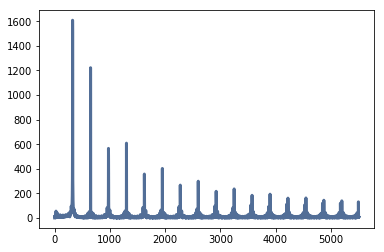

In [17]:
spectrum_segunda = segunda.make_spectrum()
spectrum_segunda.plot()

El segundo segmento corresponde a una señal de dientes de sierra, con su frecuencia fundamental cercana a la de la señal cuadrada.
Luego, se analizó el último segmento de la señal.

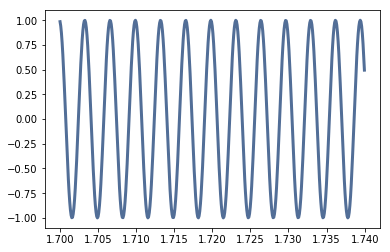

In [18]:
tercera = wave.segment(start=1.7, duration=2.3)
tercera.segment(start=1.7, duration=0.04).plot()
tercera.make_audio()

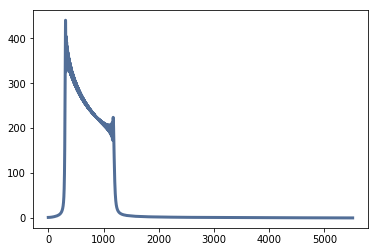

In [19]:
spectrum_tercera = tercera.make_spectrum()
spectrum_tercera.plot()

Esta ultima señal corresponde a un chirp, como se puede escuchar en el sonido y observar en el espectrograma, la frecuencia va aumentando en el tiempo, mientras que su amplitud decrece, exceptuando una parte del segmento final.

## Problema 3

La señal "incognita.wav" contiene una señal recibida desde el espacio exterior. Se sospecha que
es una señal muy débil cubierta de ruido, y que la señal solo puede ser triangular de 1000Hz o
2000Hz, diente de sierra de 1500Hz o cosenoidal de 500Hz. Se realizó el siguiente análisis para comprobar estas afirmaciones y descubrir la señal esmascarada.

Teniendo esto en cuenta, se procede a cargar la señal para su posterior análisis.

In [20]:
wave = thinkdsp.read_wave('incognita.wav')
wave.make_audio()

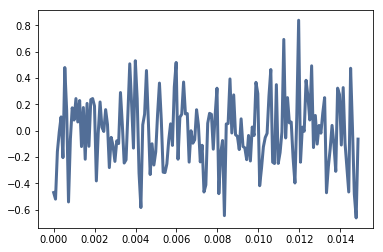

In [21]:
wave.segment(start=0.0, duration=0.015).plot()

A simple vista, no se pudo concluir nada del gráfico de la onda a pequeña escala, por lo que también se realizó el espectrograma.

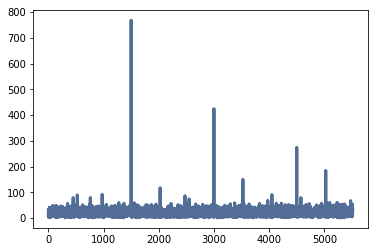

In [22]:
spectrum = wave.make_spectrum()
spectrum.plot()

Se puede visualizar que su frecuencia fundamental está muy cercana a los 1500 Hz, por lo que se realizará una comparación con el espectrograma de una onda de dientes de sierra de 1500 Hz.

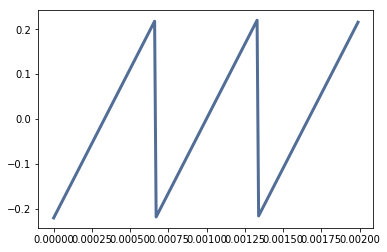

In [23]:
sierra = thinkdsp.SawtoothSignal(1500,0.22)
duration = sierra.period*3
segment = sierra.make_wave(duration, framerate=100000)
segment2 = sierra.make_wave(duration = 1, framerate=11000)
segment.plot()

In [24]:
wave2 = sierra.make_wave(duration=1, framerate=11000)
wave2.apodize()
wave2.make_audio()

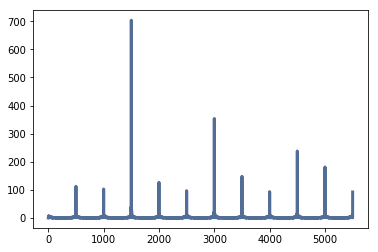

In [25]:
spectrums = wave2.make_spectrum()
spectrums.plot()

Al observar los espectrogramas, se pudo confirmar que tiene similitudes irrefutables con el espectro de una señal diente de sierra. Luego, se realizó una combinación de esta señal diente de sierra con una señal de ruido no correlado, esto se decidió ya que al ser un ruido del espacio, el ruido posee muchas variables que en la corta duración de lo que dura la señal recibida, pueden no tener relación alguna.

In [26]:
espacio = thinkdsp.UncorrelatedUniformNoise(amp=0.4)
wave3 = espacio.make_wave(duration=1, framerate=11000)
wave3.make_audio()

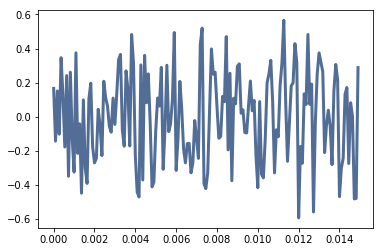

In [27]:
wave4 = segment2 + wave3
wave4.segment(start=0.0, duration=0.015).plot()

Con el gráfico de la onda no se puede concluir mucho, aunque tenga una estructura de ruido similar, por lo que se comprobará utilizando el espectrograma.

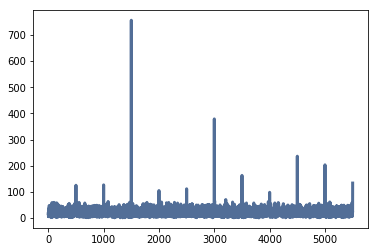

In [28]:
spectrumf = wave4.make_spectrum()
spectrumf.plot()

In [29]:
wave4.make_audio()

Al realizar la combinación de la señal de diente de sierra a 1500 Hz, junto con un ruido no correlado con amplitud regulada, se puede determinar que la señal recibida corresponde a esta definición, debido a que el espectrograma es visualmente igual a gran escala y el sonido escuchado es casi idéntico.

## Conclusión

Luego de la resolución de las situaciones planteadas, se pudieron establecer algunas observaciones finales importantes. El uso de espectrogramas para la comparación y análisis de señales fue fundamental, ya que con esto se pudo dilucidar en todos los casos el comportamiento de una señal debido a su frecuencia fundamental, frecuencia de muestreo y forma de onda.
Por otra parte, también fue importante tener en claro los conceptos utilizados, ya que fueron de mucha ayuda para lograr la resolución de estas situaciones.
Por último, cabe destacar que con el procesamiento digital de las señales, es posible volver a recrear una señal análoga al descomponer y volver a componer estas de forma correcta. La recreación de la señal análoga original no es 100% idéntica, pero la interpretación de la señal será la misma.